In [1130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from itertools import product


# 1. Import Data:

In [1131]:
games = pd.read_csv("Mobile_Game_Data.csv")

In [1132]:
games.shape

(289, 13)

In [1133]:
games.head()

,title,publisher,capital,rank,dl,rating,review,tag1,tag2,tag3,tag4,tag5,tag6
0,Uma Musume Pretty Derby,"Cygames, Inc.",Public,4.973,1000000,4.0,97100,Simulation,Breeding,Stylized,Anime,-,-
1,Fate / Grand Order,Aniplex Inc.,Public,8.272,1000000,3.8,169000,Role Playing,Turn-based RPG,Single player,Stylized,Anime,-
2,Monster Strike,"XFLAG, Inc.",Public,4.768,10000000,4.0,785000,Role Playing,Puzzle Role-playing,Physics-puzzle RPG,Single player,Stylized,Anime
3,Pokémon GO,"Niantic, Inc.",Public,10.194,100000000,3.7,15400000,Action,Action-adventure,Multiplayer,Competitive multiplayer,Stylized,Anime
4,Professional Baseball Spirits A,KONAMI,Public,5.984,1000000,4.2,91800,Sports,Baseball,Multiplayer,Competitive multiplayer,Single player,Realistic


# 2. Clean Up Data:

In [1134]:
# total nulls
games.isnull().sum()

title        0
publisher    0
capital      0
rank         0
dl           0
rating       0
review       0
tag1         0
tag2         0
tag3         0
tag4         0
tag5         0
tag6         0
dtype: int64

In [1135]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      289 non-null    object 
 1   publisher  289 non-null    object 
 2   capital    289 non-null    object 
 3   rank       289 non-null    float64
 4   dl         289 non-null    int64  
 5   rating     289 non-null    float64
 6   review     289 non-null    int64  
 7   tag1       289 non-null    object 
 8   tag2       289 non-null    object 
 9   tag3       289 non-null    object 
 10  tag4       289 non-null    object 
 11  tag5       289 non-null    object 
 12  tag6       289 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 29.5+ KB


In [1136]:
# Convert the download column to integer
games['dl'] = games.dl.replace('-',).astype('int')

In [1137]:
# Convert the rating column to float
games['rating'] = games.rating.replace('-',).astype('float')

In [1138]:
# Convert the review column to integer
games['review'] = games.review.replace('-',).astype('int')

In [1139]:
# Convert the null genre to 'Others'
games['review'] = games.review.replace('-',).astype('int')

In [1140]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      289 non-null    object 
 1   publisher  289 non-null    object 
 2   capital    289 non-null    object 
 3   rank       289 non-null    float64
 4   dl         289 non-null    int64  
 5   rating     289 non-null    float64
 6   review     289 non-null    int64  
 7   tag1       289 non-null    object 
 8   tag2       289 non-null    object 
 9   tag3       289 non-null    object 
 10  tag4       289 non-null    object 
 11  tag5       289 non-null    object 
 12  tag6       289 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 29.5+ KB


In [1141]:
# summary statistics
games.describe()

,rank,dl,rating,review
count,289.000000,2.890000e+02,289.000000,2.890000e+02
mean,34.291529,1.280131e+07,3.885467,1.180028e+06
std,9.600726,4.762886e+07,0.500413,5.155533e+06
min,3.167000,1.000000e+04,0.000000,0.000000e+00
25%,30.135000,1.000000e+05,3.700000,1.040000e+04
50%,36.000000,1.000000e+06,4.000000,3.230000e+04
75%,41.000000,1.000000e+06,4.200000,1.470000e+05
max,50.000000,5.000000e+08,5.000000,5.980000e+07


In [1142]:
games.nunique()

title        276
publisher    149
capital        2
rank         232
dl            10
rating        28
review       239
tag1          15
tag2          45
tag3          18
tag4          11
tag5          11
tag6          10
dtype: int64

In [1143]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      289 non-null    object 
 1   publisher  289 non-null    object 
 2   capital    289 non-null    object 
 3   rank       289 non-null    float64
 4   dl         289 non-null    int64  
 5   rating     289 non-null    float64
 6   review     289 non-null    int64  
 7   tag1       289 non-null    object 
 8   tag2       289 non-null    object 
 9   tag3       289 non-null    object 
 10  tag4       289 non-null    object 
 11  tag5       289 non-null    object 
 12  tag6       289 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 29.5+ KB


# 3. Exploratory Data Analysis:

****Game production per publiisher****

In [1144]:
# The number of games published by each publisher
games.publisher.value_counts()

BANDAI NAMCO Entertainment Inc.        21
SQUARE ENIX                            20
KONAMI                                 10
COLOPL, Inc.                            6
KLab Inc.                               6
                                       ..
GCREST                                  1
LILITH TECHNOLOGY HONG KONG LIMITED     1
CAMEL GAMES LIMITED                     1
Smilegate Megaport                      1
Galaxy Play Technology Limited          1
Name: publisher, Length: 149, dtype: int64

**Genre**

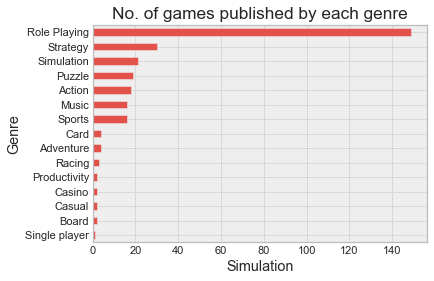

In [1145]:
# Visualize the number of games for each genre using a countplot
games.tag1.value_counts().plot(kind='barh', title='No. of games published by each genre').invert_yaxis();
plt.xlabel(games.tag1.any());
plt.ylabel('Genre');

**Ratings**

In [1146]:
# 10 Highest rated games
games.nlargest(10,'rating')

,title,publisher,capital,rank,dl,rating,review,tag1,tag2,tag3,tag4,tag5,tag6
136,Hypnosismic -Alternative Rap Battle,"Idea Factory Plus Co., Ltd",Private,30.714,500000,5.0,27000,Music,Performance,Single player,Stylized,Anime,-
7,Puzzle & Dragons,"GungHo Online Entertainment, Inc.",Public,7.597,10000000,4.9,142000,Puzzle,Jigsaw,Casual,Single player,Realistic,Offline
130,Puzzle & Dragons,"GungHo Online Entertainment, Inc.",Public,7.597,10000000,4.9,142000,Puzzle,Jigsaw,Casual,Single player,Realistic,Offline
111,Top War: Battle Game,Topwar Studio,Private,35.848,50000000,4.8,704000,Strategy,Build & battle,Multiplayer,Competitive multiplayer,Stylized,-
109,Tenchi no Gotoku,Six Waves Inc.,Public,45.250,100000,4.7,5670,Strategy,Build & battle,Single player,Stylized,Stylized-realistic,-
288,Kirameki Paradise,Famous Heart Limited,Private,45.000,50000,4.7,855,Simulation,Lifestyle,Dress-up,Single player,Stylized,Stylized-realistic
23,Idolish7,BANDAI NAMCO Online Inc.,Public,31.250,500000,4.6,48200,Music,Performance,Stylized,Anime,-,-
31,Arknights,"Yostar, Inc.",Private,25.721,1000000,4.6,27000,Strategy,Tower defense,Single player,Stylized,Anime,-
118,The Symphony of Dragon and Girls,BluStar Games Limited,Private,41.545,100000,4.6,24900,Role Playing,Casual,Stylized,Anime,-,-
183,Evony,TOP GAMES INC.,Public,41.000,100000000,4.6,801000,Strategy,Build & battle,Casual,Multiplayer,Competitive multiplayer,Single player


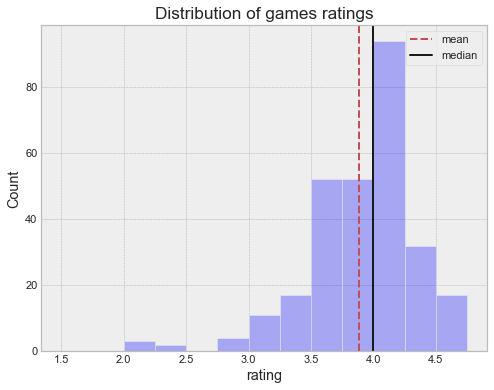

In [1147]:
# Visualize the distribution or rating
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x='rating',data=games,bins=np.arange(1.5,5,0.25),ax=ax,alpha=0.3)
plt.axvline(games.rating.mean(),color='r',ls='--',label='mean')
plt.axvline(games.rating.median(),color='k',ls='-',label='median')
plt.title('Distribution of games ratings')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'average rating by genre'}, ylabel='tag1'>

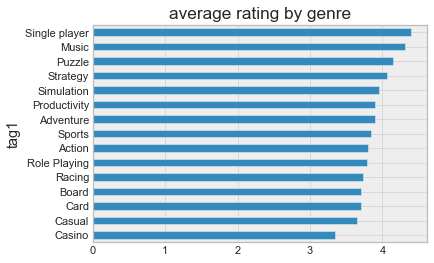

In [1148]:
# Average of average rating by category
games.groupby("tag1").mean()['rating'].sort_values(ascending = True).plot(kind = 'barh', title = 'average rating by genre')

In [1149]:
# 10 Lowest rated games
games.nsmallest(10,'rating')

,title,publisher,capital,rank,dl,rating,review,tag1,tag2,tag3,tag4,tag5,tag6
169,Ragnarok Masters,"GungHo Online Entertainment, Inc.",Public,43.400,100000,0.0,0,Role Playing,MMORPG,Multiplayer,Cooperative multiplayer,Single player,Stylized
279,Mobile Suit Gundam: Iron-Blooded Orphans,Bandai Namco Entertainment Inc.,Public,41.667,50000,2.1,1340,Role Playing,-,-,-,-,-
132,Laguna Roque Origin,GungHo Online Entertainment,Public,37.636,100000,2.2,2020,Role Playing,MMORPG,Multiplayer,Cooperative multiplayer,Single player,Stylized
204,Ragnarok Origin: MMORPG Online,"GungHo Online Entertainment, Inc.",Public,44.706,100000,2.2,2020,Role Playing,MMORPG,Multiplayer,Cooperative multiplayer,Single player,Stylized
234,Yggdra Resonance,Nuverse KK,Private,38.500,100000,2.3,4280,Role Playing,Turn-based RPG,Casual,Single player,Stylized,Anime
244,Shin Nobunaga's Ambition,HKBBGL,Private,31.185,100000,2.4,6790,Strategy,Wargame,Single player,Stylized,-,-
113,Shin Sangokushi,HK HERO ENTERTAINMENT CO.,Private,41.162,100000,2.8,6820,Strategy,Build & battle,Casual,Stylized,-,-
215,Lineage 2: Revolution,Netmarble Corporation,Public,44.750,500000,2.9,25800,Role Playing,MMORPG,Multiplayer,Single player,Stylized,Stylized-realistic
236,Echoes of Mana,SQUARE ENIX,Public,34.400,100000,2.9,5980,Action,Single player,Stylized,Anime,-,-
277,Date A Live Spirit Crisis,PANDA INTERACTIVE HONG KONG LIMITED,Private,35.500,50000,2.9,1100,Action,-,-,-,-,-


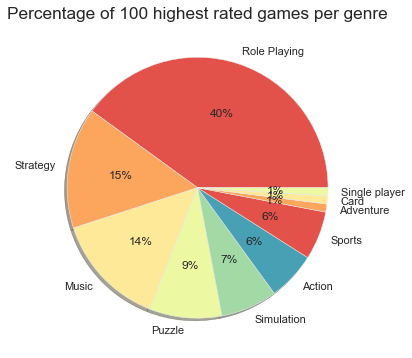

In [1150]:
# Which genre produced majority of the top 100 rated games
highest_rated_100 = games.loc[games.rating.nlargest(100).index,['tag1']].value_counts().reset_index()
highest_rated_100['tag1'] = highest_rated_100.tag1

# Visualize
sns.set_palette('Spectral')
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(highest_rated_100[0],labels=highest_rated_100.tag1,shadow=True,autopct='%1.0f%%')
ax.set(title='Percentage of 100 highest rated games per genre')
plt.show()

In [1151]:
# Get the top rated games
highest_rated_games = games.loc[games.rating.nlargest(100).index,['title','publisher','capital','rating','review','tag1']]
highest_rated_games.head(25)

,title,publisher,capital,rating,review,tag1
136,Hypnosismic -Alternative Rap Battle,"Idea Factory Plus Co., Ltd",Private,5.0,27000,Music
7,Puzzle & Dragons,"GungHo Online Entertainment, Inc.",Public,4.9,142000,Puzzle
130,Puzzle & Dragons,"GungHo Online Entertainment, Inc.",Public,4.9,142000,Puzzle
111,Top War: Battle Game,Topwar Studio,Private,4.8,704000,Strategy
109,Tenchi no Gotoku,Six Waves Inc.,Public,4.7,5670,Strategy
288,Kirameki Paradise,Famous Heart Limited,Private,4.7,855,Simulation
23,Idolish7,BANDAI NAMCO Online Inc.,Public,4.6,48200,Music
31,Arknights,"Yostar, Inc.",Private,4.6,27000,Strategy
118,The Symphony of Dragon and Girls,BluStar Games Limited,Private,4.6,24900,Role Playing
183,Evony,TOP GAMES INC.,Public,4.6,801000,Strategy


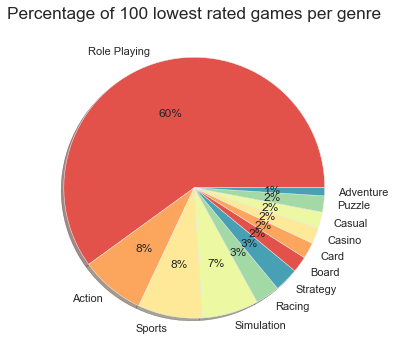

In [1152]:
# Which genre produced majority of the lowest 100 rated games
lowest_rated_100 = games.loc[games.rating.nsmallest(100).index,['tag1']].value_counts().reset_index()
lowest_rated_100['tag1'] = lowest_rated_100.tag1

# Visualize
sns.set_palette('Spectral')
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(lowest_rated_100[0],labels=lowest_rated_100.tag1,shadow=True,autopct='%1.0f%%')
ax.set(title='Percentage of 100 lowest rated games per genre')
plt.show()

In [1153]:
# Get the least rated games
lowest_rated_games = games.loc[games.rating.nsmallest(100).index,['title','publisher','capital','rating','review','tag1']]
lowest_rated_games

,title,publisher,capital,rating,review,tag1
169,Ragnarok Masters,"GungHo Online Entertainment, Inc.",Public,0.0,0,Role Playing
279,Mobile Suit Gundam: Iron-Blooded Orphans,Bandai Namco Entertainment Inc.,Public,2.1,1340,Role Playing
132,Laguna Roque Origin,GungHo Online Entertainment,Public,2.2,2020,Role Playing
204,Ragnarok Origin: MMORPG Online,"GungHo Online Entertainment, Inc.",Public,2.2,2020,Role Playing
234,Yggdra Resonance,Nuverse KK,Private,2.3,4280,Role Playing
...,...,...,...,...,...,...
78,Mahjong Soul,"Yostar, Inc.",Private,3.8,75700,Board
101,Dragon Quest Monsters Super Light,SQUARE ENIX,Public,3.8,137000,Role Playing
104,OCTOPATH TRAVELER,SQUARE ENIX,Public,3.8,25900,Role Playing
129,\nSaint Seiya: Rising Cosm,Tencent,Public,3.8,23600,Role Playing


**SimilarWeb Grossing Ranking**

In [1154]:
# sorting by the ranking in ascending order
games_ranking = games.sort_values('rank',ascending=True).reset_index().drop('index',axis=1)
games_ranking

,title,publisher,capital,rank,dl,rating,review,tag1,tag2,tag3,tag4,tag5,tag6
0,GODDESS OF VICTORY: NIKKE,Level Infinite,Public,3.167,1000000,4.1,318000,Role Playing,Action Role-Playing,Casual,Single player,Stylized,Anime
1,Monster Strike,"XFLAG, Inc.",Public,4.768,10000000,4.0,785000,Role Playing,Puzzle Role-playing,Physics-puzzle RPG,Single player,Stylized,Anime
2,Uma Musume Pretty Derby,"Cygames, Inc.",Public,4.973,1000000,4.0,97100,Simulation,Breeding,Stylized,Anime,-,-
3,Professional Baseball Spirits A,KONAMI,Public,5.984,1000000,4.2,91800,Sports,Baseball,Multiplayer,Competitive multiplayer,Single player,Realistic
4,Genshin Impact - Sumeru Debut,COGNOSPHERE PTE. LTD.,Private,7.027,50000000,4.4,3810000,Role Playing,Action Role-Playing,Single player,Stylized,Anime,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Akashic Chronicle-Apocalypse Of Dawn,Moonton,Private,49.000,100000,4.1,11400,Role Playing,Idle RPG,Single player,Stylized,Anime,-
285,Forsaken World: Gods and Demons,4399 NET LIMITED,Private,49.333,100000,3.0,4710,Role Playing,MMORPG,Single player,Stylized,Stylized-realistic,-
286,Ikémen Sengoku: Romances Across Time,"CYBIRD Co., Ltd.",Public,50.000,1000000,3.9,12700,Simulation,Life,Dating,Single player,Stylized,Anime
287,THE IDOLM@STER POP LINKS,BANDAI NAMCO Entertainment Inc.,Public,50.000,100000,3.9,5420,Role Playing,-,-,-,-,-


<AxesSubplot:title={'center':'average ranking by genre'}, ylabel='tag1'>

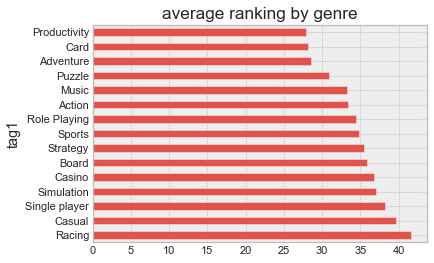

In [1155]:
# Average of average ranking by category
games.groupby("tag1").mean()['rank'].sort_values(ascending = False).plot(kind = 'barh', title = 'average ranking by genre')

In [1156]:
# Show top 50 results 
display(games_ranking[['title','publisher','rank','rating','review','tag1']].nsmallest(50,'rank'))

,title,publisher,rank,rating,review,tag1
0,GODDESS OF VICTORY: NIKKE,Level Infinite,3.167,4.1,318000,Role Playing
1,Monster Strike,"XFLAG, Inc.",4.768,4.0,785000,Role Playing
2,Uma Musume Pretty Derby,"Cygames, Inc.",4.973,4.0,97100,Simulation
3,Professional Baseball Spirits A,KONAMI,5.984,4.2,91800,Sports
4,Genshin Impact - Sumeru Debut,COGNOSPHERE PTE. LTD.,7.027,4.4,3810000,Role Playing
5,Puzzle & Dragons,"GungHo Online Entertainment, Inc.",7.597,4.9,142000,Puzzle
6,Puzzle & Dragons,"GungHo Online Entertainment, Inc.",7.597,4.9,142000,Puzzle
7,Fate / Grand Order,Aniplex Inc.,8.272,3.8,169000,Role Playing
8,Genshin Impact,miHoYo Limited,9.717,4.4,3810000,Role Playing
9,Pokémon GO,"Niantic, Inc.",10.194,3.7,15400000,Action


In [1157]:
# sorting by the ranking in descending order
games_ranking = games.sort_values('rank',ascending=False).reset_index().drop('index',axis=1)
games_ranking

,title,publisher,capital,rank,dl,rating,review,tag1,tag2,tag3,tag4,tag5,tag6
0,Ikémen Sengoku: Romances Across Time,"CYBIRD Co., Ltd.",Public,50.000,1000000,3.9,12700,Simulation,Life,Dating,Single player,Stylized,Anime
1,KOF ALLSTAR,Netmarble Corporation,Public,50.000,100000,3.3,15900,Action,Fighting,Single player,Stylized,Anime,-
2,THE IDOLM@STER POP LINKS,BANDAI NAMCO Entertainment Inc.,Public,50.000,100000,3.9,5420,Role Playing,-,-,-,-,-
3,Forsaken World: Gods and Demons,4399 NET LIMITED,Private,49.333,100000,3.0,4710,Role Playing,MMORPG,Single player,Stylized,Stylized-realistic,-
4,Hajime no Ippo: Fighting Souls,Rudel inc.,Private,49.000,100000,4.2,6530,Role Playing,Action-strategy,Single player,Stylized,Anime,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Genshin Impact - Sumeru Debut,COGNOSPHERE PTE. LTD.,Private,7.027,50000000,4.4,3810000,Role Playing,Action Role-Playing,Single player,Stylized,Anime,-
285,Professional Baseball Spirits A,KONAMI,Public,5.984,1000000,4.2,91800,Sports,Baseball,Multiplayer,Competitive multiplayer,Single player,Realistic
286,Uma Musume Pretty Derby,"Cygames, Inc.",Public,4.973,1000000,4.0,97100,Simulation,Breeding,Stylized,Anime,-,-
287,Monster Strike,"XFLAG, Inc.",Public,4.768,10000000,4.0,785000,Role Playing,Puzzle Role-playing,Physics-puzzle RPG,Single player,Stylized,Anime


In [1158]:
# Show worst 50 results 
display(games_ranking[['title','publisher','rank','rating','review','tag1']].nlargest(50,'rank'))

,title,publisher,rank,rating,review,tag1
0,Ikémen Sengoku: Romances Across Time,"CYBIRD Co., Ltd.",50.000,3.9,12700,Simulation
1,KOF ALLSTAR,Netmarble Corporation,50.000,3.3,15900,Action
2,THE IDOLM@STER POP LINKS,BANDAI NAMCO Entertainment Inc.,50.000,3.9,5420,Role Playing
3,Forsaken World: Gods and Demons,4399 NET LIMITED,49.333,3.0,4710,Role Playing
4,Hajime no Ippo: Fighting Souls,Rudel inc.,49.000,4.2,6530,Role Playing
5,Akashic Chronicle-Apocalypse Of Dawn,Moonton,49.000,4.1,11400,Role Playing
6,Artery Gear: Fusion,"BILIBILI CO.,LTD.",49.000,3.2,3380,Role Playing
7,Boso Retsuden Tansha No Tora,Donuts Co. Ltd.,49.000,3.5,49600,Role Playing
8,Lords Mobile: Kingdom Wars,IGG.COM,48.667,4.2,8010000,Strategy
9,LINE POP2,LINE Corporation,48.500,4.4,238000,Puzzle


**Relationship between variables**

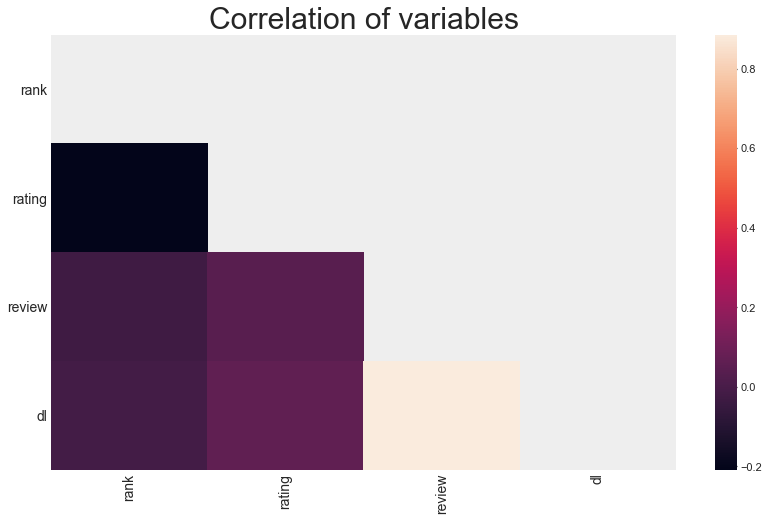

In [1159]:
games_sub = games[['rank','rating','review','dl']]
corrs = games_sub.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(14,8))

# Generate a mask for the upper triangle
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.title("Correlation of variables", fontsize= 30)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

# 4. Fit Model:

In [1160]:
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [1161]:
# clustering categories into group of similarity using KMeans.
games_cluster = games[['tag1','rank','rating','review','dl']].groupby("tag1").agg(['mean','median'])
games_cluster

rank             rating               review            \
                    mean   median      mean median          mean    median   
tag1                                                                         
Action         33.403444  35.8320  3.800000   3.85  4.005316e+06     46900   
Adventure      28.529250  27.9790  3.900000   3.95  3.577100e+05    284170   
Board          35.816500  35.8165  3.700000   3.70  7.395000e+04     73950   
Card           28.124250  28.6710  3.700000   3.75  6.117500e+05    103400   
Casino         36.800000  36.8000  3.350000   3.35  2.343400e+05    234340   
Casual         39.591000  39.5910  3.650000   3.65  1.611045e+07  16110450   
Music          33.206375  32.3435  4.312500   4.30  3.015312e+04     13200   
Productivity   27.916500  27.9165  3.900000   3.90  9.380000e+03      9380   
Puzzle         30.846526  31.6020  4.142105   4.10  2.090591e+06    453000   
Racing         41.666667  41.5000  3.733333   3.70  7.178000e+05     49400   
Role Playing   34.379638  36.3160  3.793289   3.90  1.955882e+05     33900   
Simulation     37.060905  38.5000  3.947619   3.90  5.103564e+05     13900   
Single player  38.179000  38.1790  4.400000   4.40  7.780000e+02       778   
Sports         34.793625  37.7000  3.843750   3.85  2.036661e+06     28000   
Strategy       35.467333  36.1450  4.066667   4.10  3.913129e+06     28900   

                         dl             
                       mean     median  
tag1                                    
Action         2.424722e+07    1000000  
Adventure      5.150000e+06    5250000  
Board          1.000000e+06    1000000  
Card           1.312500e+07    1000000  
Casino         5.050000e+06    5050000  
Casual         2.500500e+08  250050000  
Music          3.687500e+05     100000  
Productivity   1.000000e+05     100000  
Puzzle         2.798158e+07   10000000  
Racing         3.383333e+07    1000000  
Role Playing   3.298389e+06     500000  
Simulation     5.645714e+06     500000  
Single player  1.000000e+04      10000  
Sports         2.005312e+07    1000000  
Strategy       3.692333e+07     750000

**1. Clustering by download cases and Google Play rating**

In [1162]:
games_cluster = pd.concat([games_cluster.xs(('dl','mean') , axis = 1), games_cluster.xs(('rating','median') , axis = 1)], axis = 1)
games_cluster.head(15)

,dl,rating
,mean,median
tag1,,
Action,2.424722e+07,3.85
Adventure,5.150000e+06,3.95
Board,1.000000e+06,3.70
Card,1.312500e+07,3.75
Casino,5.050000e+06,3.35
Casual,2.500500e+08,3.65
Music,3.687500e+05,4.30
Productivity,1.000000e+05,3.90


In [1163]:
games_cluster = games_cluster.droplevel(1, axis = 1)

In [1164]:
scaler = StandardScaler().fit(games_cluster)
games_cluster_std = scaler.transform(games_cluster)

In [1165]:
error = []
for i in range(1,15): # we only have 15 categories, this is prabably too much.
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 101).fit(games_cluster_std)
    error.append(km.inertia_)

Text(0, 0.5, 'Error')

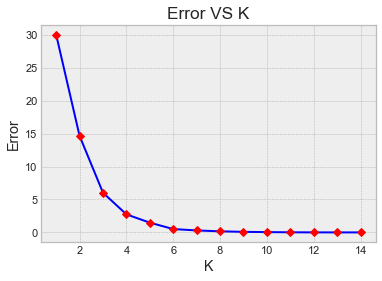

In [1166]:
plt.plot(range(1,15), error, marker = 'D', markerfacecolor = 'red', color = 'blue', markeredgecolor = 'red')
plt.title("Error VS K")
plt.xlabel('K')
plt.ylabel('Error')

In [1167]:
# Fit KMeans with optimal K
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 101).fit(games_cluster_std)
pred = km.labels_
centroids = km.cluster_centers_

**Result**

In [1168]:
# result
result = games_cluster.copy()
result.reset_index(inplace = True)
result['cluster'] = pred
# result = pd.DataFrame(np.column_stack((df_cluster.index, pred)), columns = ['category','cluster'])
result.head()

,tag1,dl,rating,cluster
0,Action,2.424722e+07,3.85,0
1,Adventure,5.150000e+06,3.95,0
2,Board,1.000000e+06,3.70,0
3,Card,1.312500e+07,3.75,0
4,Casino,5.050000e+06,3.35,3


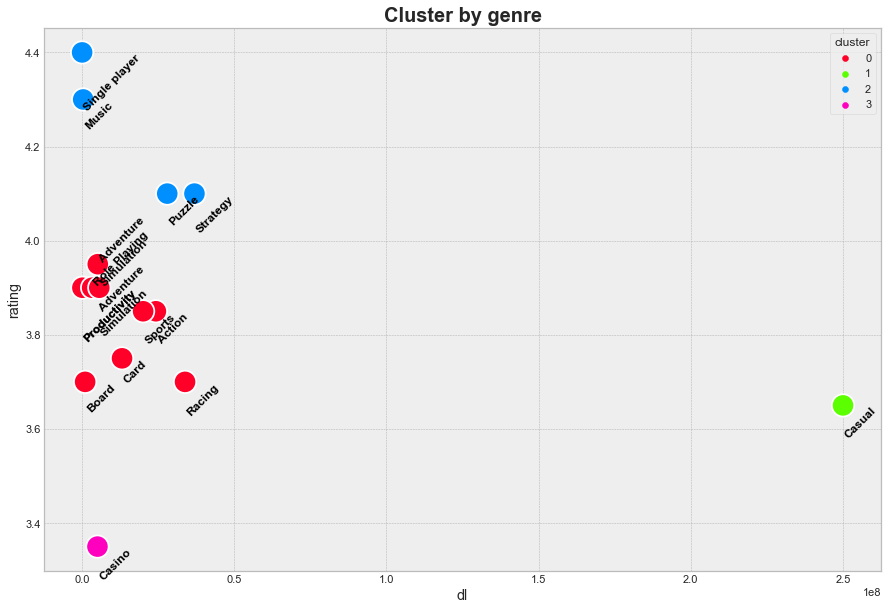

In [1169]:
fig_r, ax_r = plt.subplots(figsize = (15,10))

sns.scatterplot(x = 'dl', y = 'rating', hue = 'cluster', palette = 'gist_rainbow', 
                data = result, s = 500, ax = ax_r)


plt.legend(bbox_to_anchor = (1,1), title = 'cluster')

for i in range(result.shape[0]):
    
    if result.iloc[i,0] == 'Adventure':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Productivity':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='top',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Simulation':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Role Playing':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    else:
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='top',size='medium', color='black', weight='semibold',rotation=45)
        
    
plt.title("Cluster by genre",fontweight='bold',fontsize=20)
plt.show()

**Cluster Result**

(a) Cluster 0 red
(Adventure, Role-Playing, Simulation, Productivity, Sports, Actinos, Board, Card, Racing)
Medium-high rating and small-medium average D/L cases.

(b) Cluster 1 green
(Casual)
Medium-low rating and large average number of D/L cases.

(c) Cluster 2 blue
(Single Player, Music, Puzzle, Strategy)
High rating and small average number of D/L cases.

(d) Cluster 3 Pink
(Casino)
Low rating and small average number of D/L cases.

**2. Clustering by review counts and Google Play rating**

In [1170]:
# clustering categories into group of similarity using KMeans.
games_cluster_2 = games[['tag1','review','dl','rank','rating']].groupby("tag1").agg(['mean','median'])
games_cluster_2

review                      dl                  rank  \
                       mean    median          mean     median       mean   
tag1                                                                        
Action         4.005316e+06     46900  2.424722e+07    1000000  33.403444   
Adventure      3.577100e+05    284170  5.150000e+06    5250000  28.529250   
Board          7.395000e+04     73950  1.000000e+06    1000000  35.816500   
Card           6.117500e+05    103400  1.312500e+07    1000000  28.124250   
Casino         2.343400e+05    234340  5.050000e+06    5050000  36.800000   
Casual         1.611045e+07  16110450  2.500500e+08  250050000  39.591000   
Music          3.015312e+04     13200  3.687500e+05     100000  33.206375   
Productivity   9.380000e+03      9380  1.000000e+05     100000  27.916500   
Puzzle         2.090591e+06    453000  2.798158e+07   10000000  30.846526   
Racing         7.178000e+05     49400  3.383333e+07    1000000  41.666667   
Role Playing   1.955882e+05     33900  3.298389e+06     500000  34.379638   
Simulation     5.103564e+05     13900  5.645714e+06     500000  37.060905   
Single player  7.780000e+02       778  1.000000e+04      10000  38.179000   
Sports         2.036661e+06     28000  2.005312e+07    1000000  34.793625   
Strategy       3.913129e+06     28900  3.692333e+07     750000  35.467333   

                          rating         
                median      mean median  
tag1                                     
Action         35.8320  3.800000   3.85  
Adventure      27.9790  3.900000   3.95  
Board          35.8165  3.700000   3.70  
Card           28.6710  3.700000   3.75  
Casino         36.8000  3.350000   3.35  
Casual         39.5910  3.650000   3.65  
Music          32.3435  4.312500   4.30  
Productivity   27.9165  3.900000   3.90  
Puzzle         31.6020  4.142105   4.10  
Racing         41.5000  3.733333   3.70  
Role Playing   36.3160  3.793289   3.90  
Simulation     38.5000  3.947619   3.90  
Single player  38.1790  4.400000   4.40  
Sports         37.7000  3.843750   3.85  
Strategy       36.1450  4.066667   4.10

In [1172]:
games_cluster_2 = pd.concat([games_cluster_2.xs(('review','mean'), axis = 1), games_cluster_2.xs(('rating','median'), axis = 1)], axis = 1)
games_cluster_2.head(15)

,review,rating
,mean,median
tag1,,
Action,4.005316e+06,3.85
Adventure,3.577100e+05,3.95
Board,7.395000e+04,3.70
Card,6.117500e+05,3.75
Casino,2.343400e+05,3.35
Casual,1.611045e+07,3.65
Music,3.015312e+04,4.30
Productivity,9.380000e+03,3.90


In [1173]:
games_cluster_2 = games_cluster_2.droplevel(1, axis = 1)

In [1174]:
scaler = StandardScaler().fit(games_cluster_2)
games_cluster_2_std = scaler.transform(games_cluster_2)

In [1175]:
error = []
for i in range(1,15): # we only have 15 categories, this is prabably too much.
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 101).fit(games_cluster_2_std)
    error.append(km.inertia_)

Text(0, 0.5, 'Error')

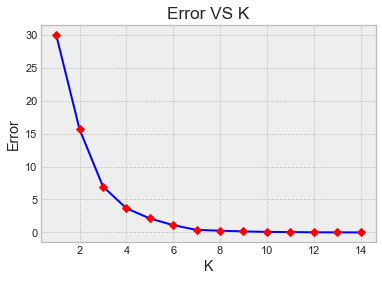

In [1176]:
plt.plot(range(1,15), error, marker = 'D', markerfacecolor = 'red', color = 'blue', markeredgecolor = 'red')
plt.title("Error VS K")
plt.xlabel('K')
plt.ylabel('Error')

In [1177]:
# Fit KMeans with optimal K
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 101).fit(games_cluster_2_std)
pred = km.labels_
centroids = km.cluster_centers_

**Result**

In [1178]:
# result
result = games_cluster_2
result.reset_index(inplace = True)
result['cluster'] = pred
# result = pd.DataFrame(np.column_stack((df_cluster.index, pred)), columns = ['category','cluster'])
result.head()

,tag1,review,rating,cluster
0,Action,4.005316e+06,3.85,0
1,Adventure,3.577100e+05,3.95,0
2,Board,7.395000e+04,3.70,0
3,Card,6.117500e+05,3.75,0
4,Casino,2.343400e+05,3.35,3


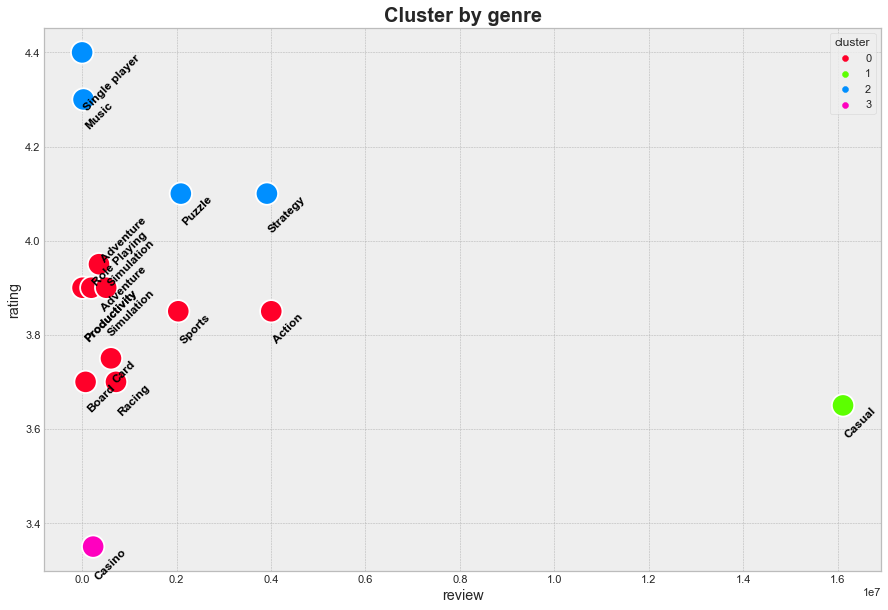

In [1179]:
fig_r, ax_r = plt.subplots(figsize = (15,10))

sns.scatterplot(x = 'review', y = 'rating', hue = 'cluster', palette = 'gist_rainbow', 
                data = result, s = 500, ax = ax_r)


plt.legend(bbox_to_anchor = (1,1), title = 'cluster')

for i in range(result.shape[0]):
    
    if result.iloc[i,0] == 'Adventure':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Productivity':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='top',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Simulation':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Role Playing':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    else:
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='top',size='medium', color='black', weight='semibold',rotation=45)
        
    
plt.title("Cluster by genre",fontweight='bold',fontsize=20)
plt.show()

**Cluster Result**

(a) Cluster 0 red
(Adventure, Role-Playing, Simulation, Productivity, Sports, Actinos, Board, Card, Racing)
Medium-high rating and small-medium average review counts.

(b) Cluster 1 green
(Casual)
Medium-low rating and large average number of review counts.

(c) Cluster 2 blue
(Single Player, Music, Puzzle, Strategy)
High rating and small average number of review counts.

(d) Cluster 3 Pink
(Casino)
Low rating and small average number of review counts.

**3. Clustering by Google Play download cases and SimilarWeb ranking**

In [ ]:
# clustering categories into group of similarity using KMeans.
games_cluster_3 = games[['tag1','rank','rating','review','dl']].groupby("tag1").agg(['mean','median'])
games_cluster_3

In [ ]:
games_cluster_3 = pd.concat([games_cluster_3.xs(('dl','mean'), axis = 1), games_cluster_3.xs(('rank','median'), axis = 1)], axis = 1)
games_cluster_3.head(15)

In [ ]:
games_cluster_3 = games_cluster_3.droplevel(1, axis = 1)

In [ ]:
scaler = StandardScaler().fit(games_cluster_3)
games_cluster_3_std = scaler.transform(games_cluster_3)

In [ ]:
error = []
for i in range(1,15): # we only have 15 categories, this is prabably too much.
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 101).fit(games_cluster_3_std)
    error.append(km.inertia_)

In [ ]:
plt.plot(range(1,15), error, marker = 'D', markerfacecolor = 'red', color = 'blue', markeredgecolor = 'red')
plt.title("Error VS K")
plt.xlabel('K')
plt.ylabel('Error')

In [ ]:
# Fit KMeans with optimal K
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 101).fit(games_cluster_3_std)
pred = km.labels_
centroids = km.cluster_centers_

**Result**

In [ ]:
# result
result = games_cluster_3
result.reset_index(inplace = True)
result['cluster'] = pred
# result = pd.DataFrame(np.column_stack((df_cluster.index, pred)), columns = ['category','cluster'])
result.head()

In [ ]:
fig_r, ax_r = plt.subplots(figsize = (15,10))

sns.scatterplot(x = 'dl', y = 'rank', hue = 'cluster', palette = 'gist_rainbow', 
                data = result, s = 500, ax = ax_r).invert_yaxis()


plt.legend(bbox_to_anchor = (1,1), title = 'cluster')

for i in range(result.shape[0]):
    
    if result.iloc[i,0] == 'Adventure':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Productivity':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Simulation':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Role Playing':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    else:
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
        
    
plt.title("Cluster by genre",fontweight='bold',fontsize=20)
plt.show()

**Cluster Result**

(a) Cluster 0 red
(Strategy, Role-Playing, Simulation, Single-Player, Sports, Action, Board, Casino)
Medium-high ranking and small average D/L cases.

(b) Cluster 1 green
(Productivity, Adventure, Card, Music, Puzzle)
High ranking and small average D/L cases.

(c) Cluster 2 blue
(Casual)
Medium-low ranking and large average D/L cases.

(d) Cluster 3 Pink
(Racing)
Low ranking and small number of D/L cases.

**4. Clustering by Google Play review counts and SimilarWeb ranking**

In [ ]:
# clustering categories into group of similarity using KMeans.
games_cluster_4 = games[['tag1','rank','rating','review','dl']].groupby("tag1").agg(['mean','median'])
games_cluster_4

In [ ]:
games_cluster_4 = pd.concat([games_cluster_4.xs(('review','mean'), axis = 1), games_cluster_4.xs(('rank','median'), axis = 1)], axis = 1)
games_cluster_4.head(15)

In [ ]:
games_cluster_4 = games_cluster_4.droplevel(1, axis = 1)

In [ ]:
scaler = StandardScaler().fit(games_cluster_4)
games_cluster_4_std = scaler.transform(games_cluster_4)

In [ ]:
error = []
for i in range(1,15): # we only have 15 categories, this is prabably too much.
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 101).fit(games_cluster_4_std)
    error.append(km.inertia_)

In [ ]:
plt.plot(range(1,15), error, marker = 'D', markerfacecolor = 'red', color = 'blue', markeredgecolor = 'red')
plt.title("Error VS K")
plt.xlabel('K')
plt.ylabel('Error')

In [ ]:
# Fit KMeans with optimal K
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 101).fit(games_cluster_4_std)
pred = km.labels_
centroids = km.cluster_centers_

**Result**

In [ ]:
# result
result = games_cluster_4
result.reset_index(inplace = True)
result['cluster'] = pred
# result = pd.DataFrame(np.column_stack((df_cluster.index, pred)), columns = ['category','cluster'])
result.head()

In [ ]:
fig_r, ax_r = plt.subplots(figsize = (15,10))

sns.scatterplot(x = 'review', y = 'rank', hue = 'cluster', palette = 'gist_rainbow', 
                data = result, s = 500, ax = ax_r).invert_yaxis()


plt.legend(bbox_to_anchor = (1,1), title = 'cluster')

for i in range(result.shape[0]):
    
    if result.iloc[i,0] == 'Adventure':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Productivity':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Simulation':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    if result.iloc[i,0] == 'Role Playing':
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
    else:
        plt.text(result.iloc[i,1], result.iloc[i,2], result.iloc[i,0][0:],horizontalalignment='left',verticalalignment='bottom',size='medium', color='black', weight='semibold',rotation=45)
        
    
plt.title("Cluster by genre",fontweight='bold',fontsize=20)
plt.show()

**Cluster Result**

(a) Cluster 0 red
(Board, Role-Playing, Simulation, Single-Player, Sports, Racing, Casino): 
Medium-low ranking and small average review counts.

(b) Cluster 1 green
(Casual): 
Low ranking and large average review counts.

(c) Cluster 2 blue
(Productivity, Adventure, Card, Music, Puzzle): 
High ranking and small average review counts.

(d) Cluster 3 Pink
(Action, Strategy): 
Medium-high ranking medium-small number of review counts.

# 5. Conclusion

I picked this dataset of top-50 grossing ranking mobile games (according to SimilarWeb) and analyzed them by 15 unique game categories as identified by Google Play. In short, I used KMeans to cluter each genre category into the x-y scatter plot (D/L cases or review counts as x-axis; Google Play rating or SimilarWeb rank as y-axis), which de@icts the casual positive relationship between the game's grossing and casusalness.

I found that:
1. Within the mobile game titles under this data set, RPG, Strategy and Simulation are the most common genres spanning across high-rated games and low-rated segments. On the other hand, Music, Card and Puzzle belong to the minority genre groups while Casino,and Racing are least represented in this dataset. 
2. When we look at the distriution of SimilarWeb rating, the data set is negatively skewed with the median positioned at 4 out of 5.
3. Music, Puzzle and Strategy single-player games are those which score the hightest average rating according to Google Play. This exemplfies that the core mobile gamers cluster into titles of these genres. On the other hands, Action and Sports games tend to score lower rating on Google Play. Both groups posted smaller volume of review counts and download cases compared with all the Casual games. 
4. Based on the correlation efficient matrix, the higher ranking on SimilarWeb, the higher rating on Google Play. On Google Play, the review counts and the download cases are positively correlated.
5. On average, the Strategy genre is rated higher than Card genre on Google Play while Card game geenrates higher grossing than the Strategy genre does according to SimilarWeb.
6. Google Play gives lowest rating to Casino games while it generates higher grossing than Racing games do according to Simialr Web.
7. Casual games are relatively less popular and less profitablle than most of other game genres based on Similar Web and Google Play although boasts the largest number of review counts and the download cases.
